In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import seaborn as sns

In [188]:
iris = sns.load_dataset('iris')
data = load_iris()
df = pd.DataFrame(data = data.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
df['species'] = iris['species']
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [190]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [194]:
target_data = df.iloc[:,4]
target_data.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [206]:
cluster_data = df.iloc[:,[2,3]]
cluster_data

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


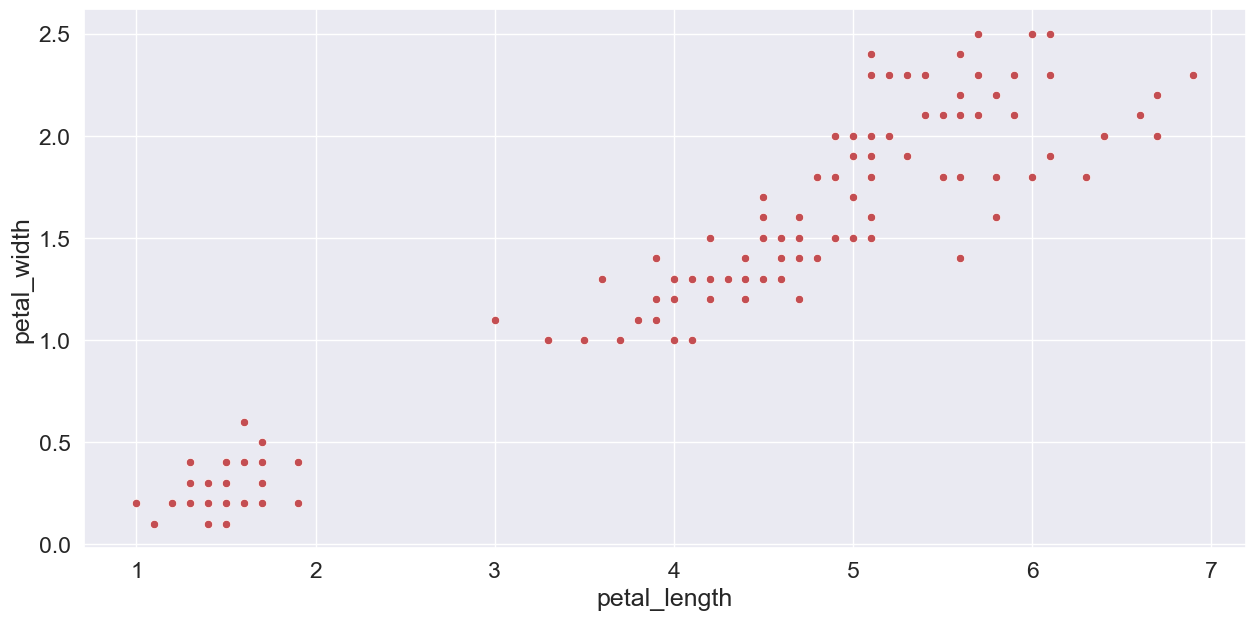

In [204]:
fig,ax = plt.subplots(figsize = (15,7))
sns.set(font_scale = 1.5)
ax= sns.scatterplot(x= df['petal_length'],y = df['petal_width'], color = 'r')
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
plt.show()

In [212]:
from sklearn.cluster import KMeans
scs = []
for i in range(1,11):
    km = KMeans(i)
    km.fit(cluster_data)
    scs.append(km.inertia_)
np.array(scs)

C:\Users\Srivathsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Srivathsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Srivathsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Srivathsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memor

array([550.89533333,  86.39021985,  31.37135897,  19.46598901,
        14.17108586,  11.41641667,   9.51754999,   8.41178514,
         6.72844528,   6.02641042])

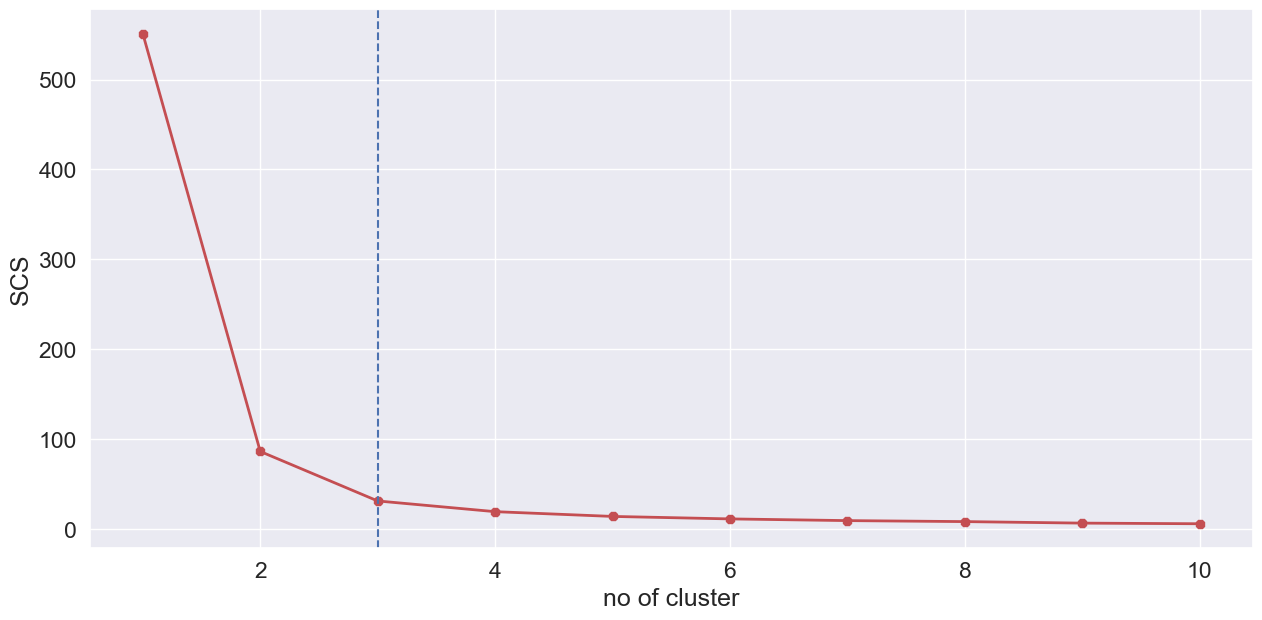

In [216]:
fig,ax = plt.subplots(figsize = (15,7))
ax = plt.plot(range(1,11),scs ,linewidth = 2,color = 'r',marker ='8')
plt.axvline(x =3,ls = '--')
plt.xlabel('no of cluster')
plt.ylabel('SCS')
plt.show()

In [222]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters = 3, init = 'k-means++')
kms.fit(cluster_data)

C:\Users\Srivathsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [224]:
cluster = cluster_data.copy()
cluster['predict_cluster'] = kms.fit_predict(cluster_data)
cluster

C:\Users\Srivathsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,petal_length,petal_width,predict_cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [226]:
kms.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

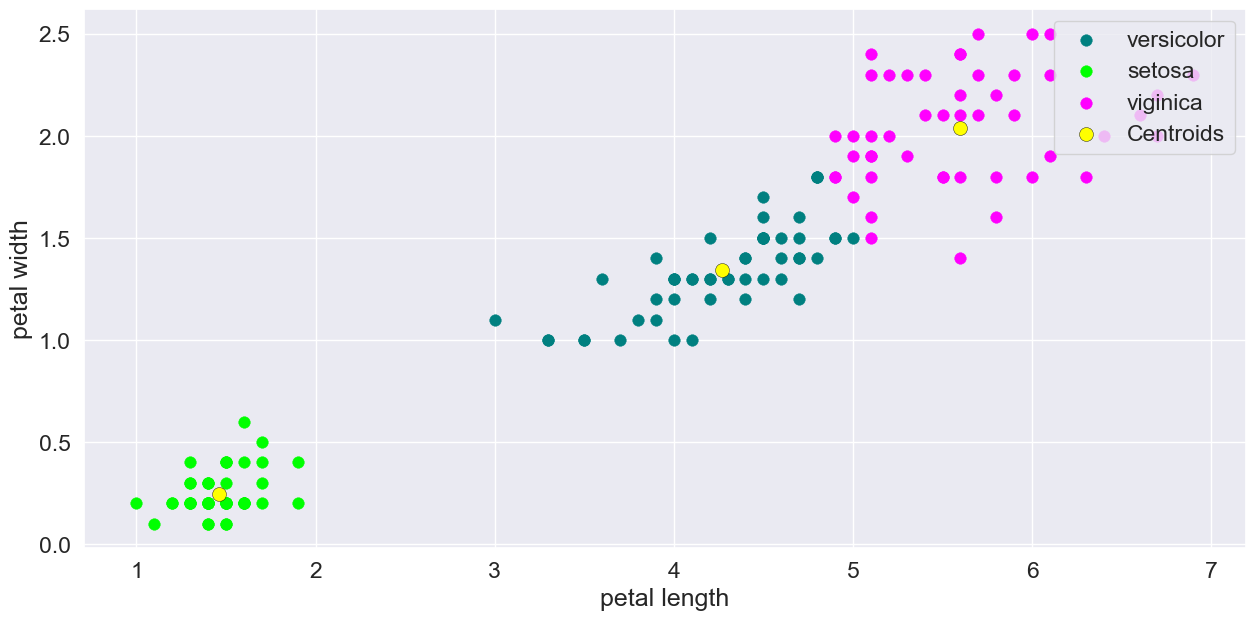

In [232]:
fig,ax= plt.subplots(figsize = (15,7))
plt.scatter(x = cluster[cluster['predict_cluster']==0]['petal_length'],y = cluster[cluster['predict_cluster']==0]['petal_width'],s =70,edgecolor = 'teal',linewidth = 0.3,c ='teal',label = 'versicolor')
plt.scatter(x = cluster[cluster['predict_cluster']==1]['petal_length'],y = cluster[cluster['predict_cluster']==1]['petal_width'],s =70,edgecolor = 'lime',linewidth = 0.3,c ='lime',label = 'setosa')
plt.scatter(x = cluster[cluster['predict_cluster']==2]['petal_length'],y = cluster[cluster['predict_cluster']==2]['petal_width'],s =70,edgecolor = 'magenta',linewidth = 0.3,c ='magenta',label = 'viginica')
plt.scatter(x=  kms.cluster_centers_[:,0],y= kms.cluster_centers_ [:,1],s = 100, c= 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')

ax.set_xlabel('petal length')

ax.set_ylabel('petal width')
plt.show()





In [ ]:
export PATH=/Library/TeX/texbin:$PATH
